# Analysis and Prediction of Daily Global Confirmed Cases

As done on 22 April 2020 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global_1.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_deaths_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_recovered_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global.csv


In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global_1.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_deaths_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_recovered_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global.csv


In [5]:

import requests
import pandas as pd
import io

BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
CONFIRMED = 'time_series_covid19_confirmed_global.csv'
DEATH = 'time_series_covid19_deaths_global.csv'
RECOVERED = 'time_series_covid19_recovered_global.csv'
CONFIRMED_US = 'time_series_covid19_confirmed_US.csv'
DEATH_US = 'time_series_covid19_deaths_US.csv'

def get_covid_data(subset = 'CONFIRMED'):
    """This function returns the latest available data subset of COVID-19. 
        The returned value is in pandas DataFrame type.
    Args:
        subset (:obj:`str`, optional): Any value out of 5 subsets of 'CONFIRMED',
        'DEATH', 'RECOVERED', 'CONFIRMED_US' and 'DEATH_US' is a valid input. If the value
        is not chosen or typed wrongly, CONFIRMED subet will be returned.
    """    
    switcher =  {
                'CONFIRMED'     : BASE_URL + CONFIRMED,
                'DEATH'         : BASE_URL + DEATH,
                'RECOVERED'     : BASE_URL + RECOVERED,
                'CONFIRMED_US'  : BASE_URL + CONFIRMED_US,
                'DEATH_US'      : BASE_URL + DEATH_US,
                
                }

    CSV_URL = switcher.get(subset, BASE_URL + CONFIRMED)

    with requests.Session() as s:
        download        = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        data            = pd.read_csv(io.StringIO(decoded_content))

    return data

In [8]:
deaths=get_covid_data(subset = 'DEATH') # global deaths
confirmed_cases=get_covid_data(subset = 'CONFIRMED')# confirmed cases

**DATA EXPLORATION AND PLOTTING**

Growth of cases in Brazil, Canada, Germany, US, Spain, Italy from 1/22/20

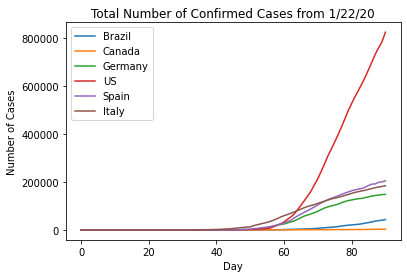

In [9]:
countries=['Brazil', 'Canada', 'Germany','US','Spain','Italy']
y=confirmed_cases.loc[confirmed_cases['Country/Region']=='Italy'].iloc[0,4:]
s = pd.DataFrame({'Italy':y})
for c in countries:    
    s[c] = confirmed_cases.loc[confirmed_cases['Country/Region']==c].iloc[0,4:]
    plt.plot(range(y.shape[0]),s[c],label=c)#    print(s[c])
plt.title('Total Number of Confirmed Cases from 1/22/20')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.legend(loc="best")
plt.show()

In [10]:
dates=confirmed_cases.columns.values.tolist()
dates=dates[4:]

World wide growth of cases

In [11]:
country_list=confirmed_cases['Country/Region'].unique()
confirmed = pd.DataFrame({'Italy':y})
dict={}
a=[]
b=[]

for c in country_list:
    a.append(c)
    confirmed=( confirmed_cases.loc[confirmed_cases['Country/Region']==c].iloc[:,4:].sum(axis=0))
    b.append(confirmed[y.shape[0]-1])  
    dict[c]=confirmed[y.shape[0]-1]

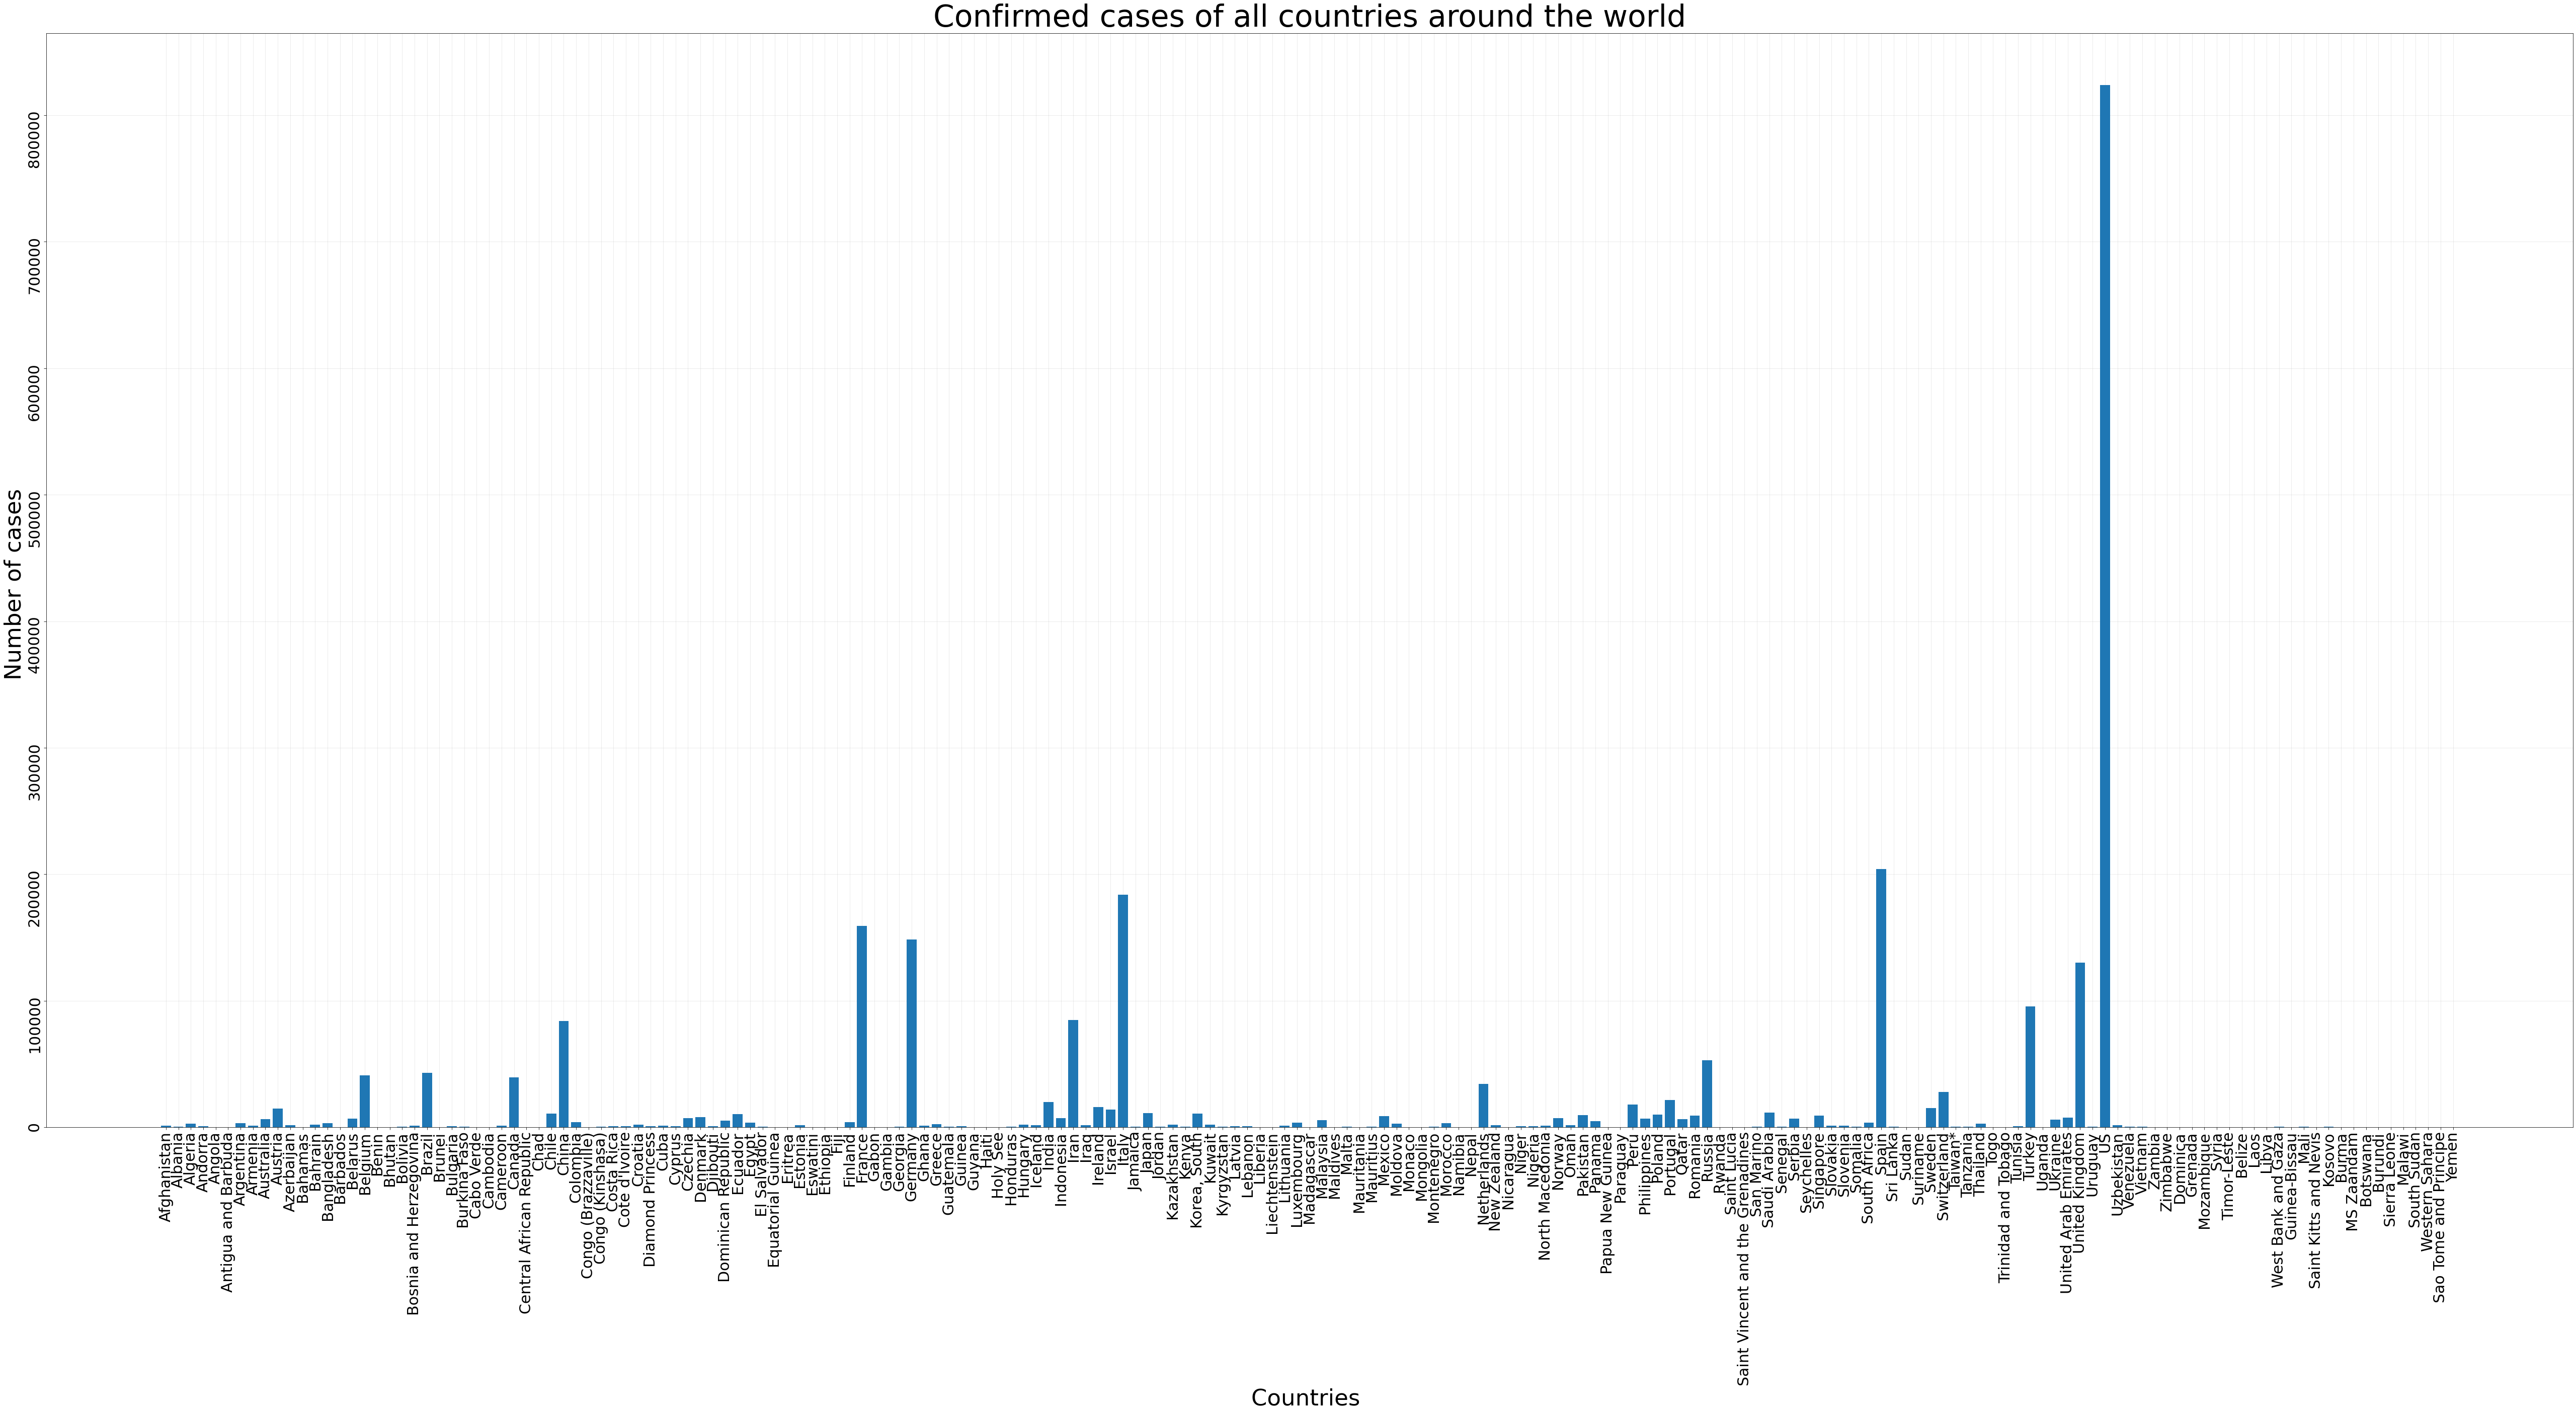

In [12]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(90,40))
f.add_subplot(111)

barWidth=1
plt.axes(axisbelow=True)
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
plt.bar(a,b,linewidth=17.0)

plt.xlabel("Countries ",fontsize=45)
plt.ylabel("Number of cases ",fontsize=45)
plt.title("Confirmed cases of all countries around the world",fontsize=60)
plt.grid(alpha=0.3)
plt.tick_params(size=5,labelsize = 30,rotation=90)
plt.show()

Growth of cases in Canada

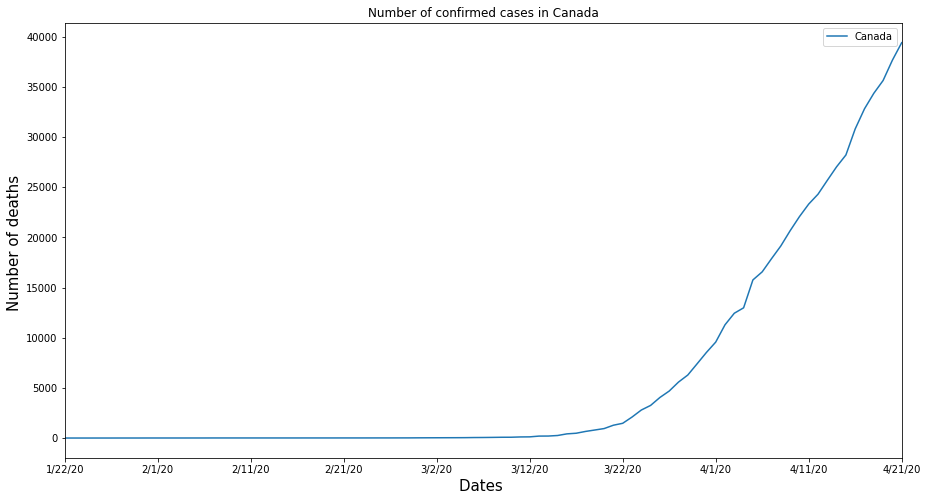

In [13]:
plt.figure(figsize=(15, 8))
canada = confirmed_cases.loc[confirmed_cases['Country/Region']=='Canada'].iloc[:,4:].sum(axis=0)
canada.tail()
canada.plot(label='Canada')
plt.legend()
plt.title("Number of confirmed cases in Canada")
plt.xlabel("Dates ",fontsize=15)
plt.ylabel("Number of deaths ",fontsize=15)
plt.show()

Moving Average

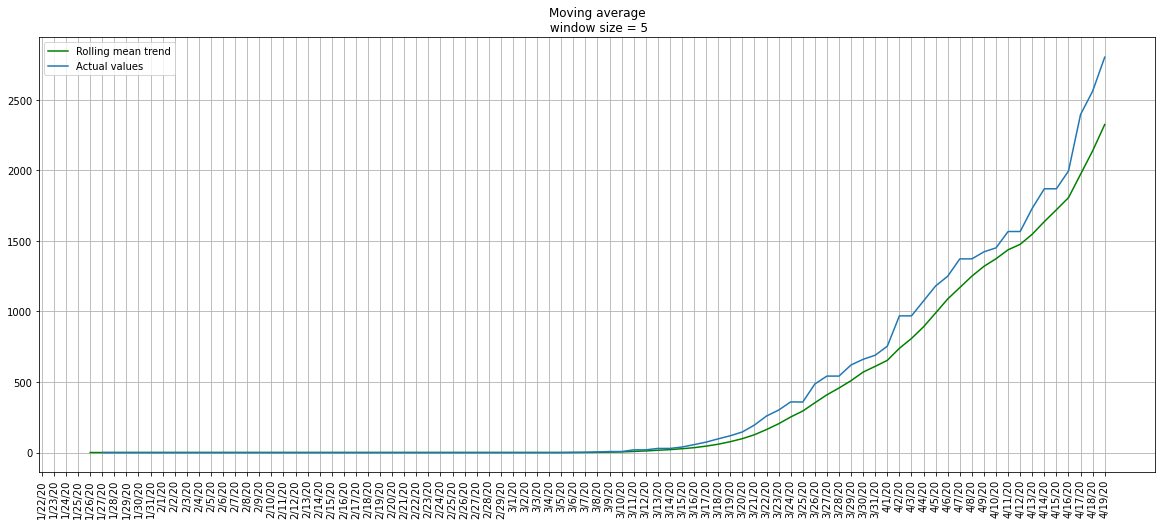

In [14]:
CAN = confirmed_cases[confirmed_cases['Country/Region']=='Canada']

CAN = pd.DataFrame(CAN.iloc[0,4:-2])

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(20,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
        
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(CAN, 5)

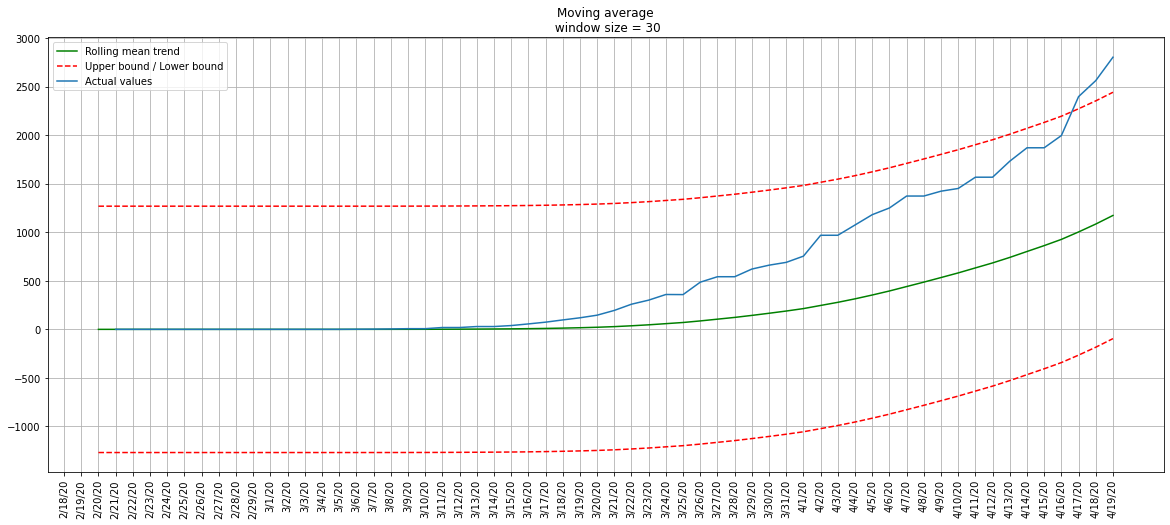

In [15]:
plot_moving_average(CAN, 30, plot_intervals=True)

In [16]:
c=[]
for i in dates:
  c= confirmed_cases.iloc[:,4:].sum(axis=0)
  

**ANALYSIS AND TRAINING OF DATA**

In [17]:


df = pd.DataFrame(columns=['ds','y'])
df
df['ds'] = pd.to_datetime(dates)
for  j in range(0,len(c)):
  df['y'][j]=pd.to_numeric(c[j])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, BayesianRidge

In [19]:
X = np.array([i for i in range(len(dates))]).reshape(-1, 1)
Y = np.array(c).reshape(-1, 1)

**Future forcasting**

In [20]:
days_in_future = 15 #next 2 weeks
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-15]
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, Y, test_size=0.10, shuffle=False)

Model for predicting confirmed cases

1. Support vector machines

In [21]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(C=1,degree=5,kernel='poly',epsilon=0.01)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 109533.96818372367
MSE: 17655916816.733513


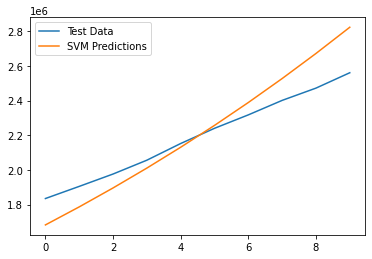

In [22]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

Transforming our data for polynomial regression

In [23]:

poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

2. Linear regression

In [24]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 209804.23984814258
MSE: 60545130284.250465


In [25]:

print(linear_model.coef_)

[[ 0.00000000e+00  2.40743838e+04 -1.02103475e+03  1.26125562e+01]]


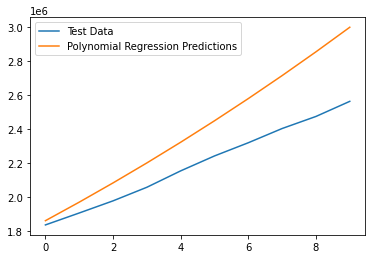

In [26]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

3. Bayesian ridge polynomial regression 

In [27]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [28]:
bayesian_search.best_params_

{'tol': 0.01,
 'lambda_2': 1e-05,
 'lambda_1': 0.0001,
 'alpha_2': 1e-05,
 'alpha_1': 1e-07}

In [29]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 215570.06786241732
MSE: 66260126208.89424


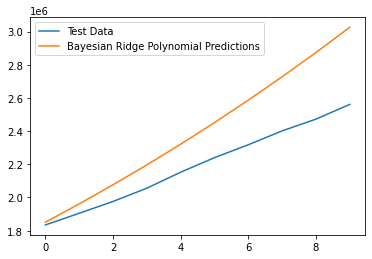

In [30]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

**Predictions **

In [42]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Growth of Confirmed Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('Number of Cases', size=15)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 15})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()


Prediction via SVM

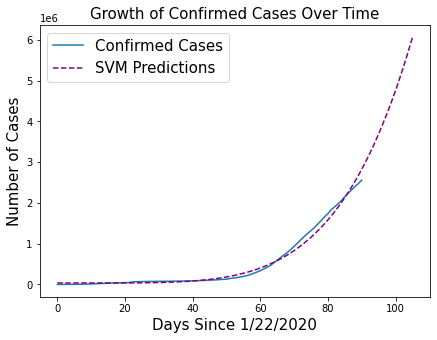

In [43]:
plot_predictions(adjusted_dates, c, svm_pred, 'SVM Predictions', 'purple')

Prediction via Polynomial Regression

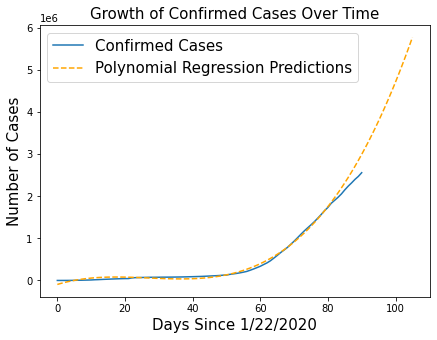

In [44]:
plot_predictions(adjusted_dates, c, linear_pred, 'Polynomial Regression Predictions', 'orange')

Prediction via Bayesian Ridge Regression

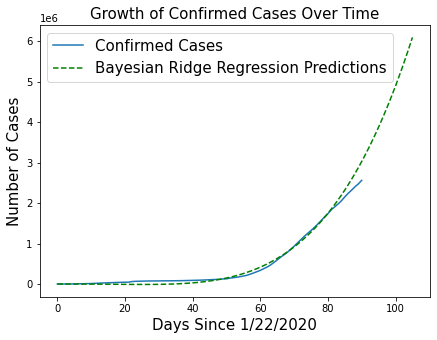

In [45]:
plot_predictions(adjusted_dates, c, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

Future predictions using SVM 

In [46]:

svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Prediction of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Prediction of Confirmed Cases Worldwide
0,04/27/2020,3885265.0
1,04/28/2020,4089945.0
2,04/29/2020,4303240.0
3,04/30/2020,4525422.0
4,05/01/2020,4756764.0
5,05/02/2020,4997548.0
6,05/03/2020,5248058.0
7,05/04/2020,5508588.0
8,05/05/2020,5779434.0
9,05/06/2020,6060900.0


Future predictions using polynomial regression

In [47]:
# 
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Prediction of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

,Date,Polynomial Prediction of Confirmed Cases Worldwide
0,04/27/2020,3965771.0
1,04/28/2020,4145143.0
2,04/29/2020,4329813.0
3,04/30/2020,4519857.0
4,05/01/2020,4715351.0
5,05/02/2020,4916371.0
6,05/03/2020,5122991.0
7,05/04/2020,5335289.0
8,05/05/2020,5553338.0
9,05/06/2020,5777217.0


Future predictions using Bayesian Ridge

In [48]:
#  
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Prediction of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

,Date,Bayesian Ridge Prediction of Confirmed Cases Worldwide
0,04/27/2020,4066095.0
1,04/28/2020,4262189.0
2,04/29/2020,4465190.0
3,04/30/2020,4675256.0
4,05/01/2020,4892548.0
5,05/02/2020,5117228.0
6,05/03/2020,5349459.0
7,05/04/2020,5589407.0
8,05/05/2020,5837239.0
9,05/06/2020,6093125.0


**Using prophet for automate future forecasting and predictions**

***Prophet***  
We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It is also an open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.



***Why Prophet?***  
Prophet is easy to customize and use, and to produce accurate forecasts which can be explained intuitively with supporting evidence such as forecast seasonality components. It allows the analyst to explain in an intuitive and convinving manner to higher management as to why the forecasts are as such, and the plausible underlying factors that contribute to its result. Furthermore, it is also open-source! :)



***References***
1. https://facebook.github.io/prophet/
2. https://facebook.github.io/prophet/docs/
3. https://github.com/facebook/prophet
 

In [49]:
from fbprophet import Prophet

Forecasting Confirmed Cases Worldwide with Prophet (Baseline)  
We perform a week's ahead forecast with Prophet, with 95% prediction intervals. Here, no tweaking of seasonality-related parameters and additional regressors are performed.


In [50]:
m = Prophet(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
93,2020-04-24
94,2020-04-25
95,2020-04-26
96,2020-04-27
97,2020-04-28


In [51]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2020-04-24,2.807049e+06,2.788768e+06,2.822561e+06
94,2020-04-25,2.887917e+06,2.863069e+06,2.912346e+06
95,2020-04-26,2.969593e+06,2.933222e+06,3.003615e+06
96,2020-04-27,3.048092e+06,3.000435e+06,3.093293e+06
97,2020-04-28,3.128978e+06,3.069031e+06,3.185270e+06


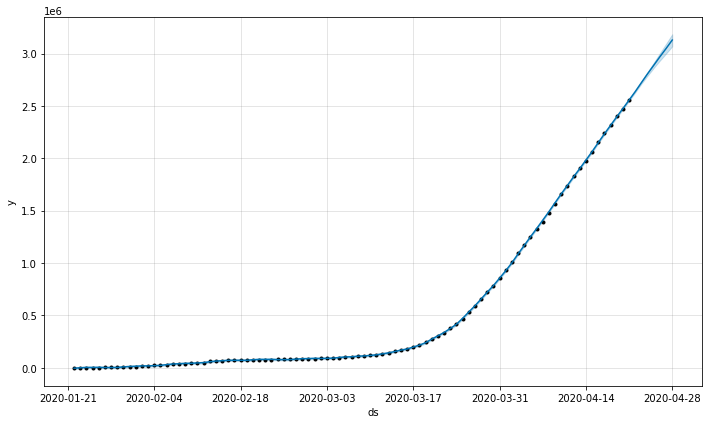

In [53]:
confirmed_forecast_plot = m.plot(forecast)

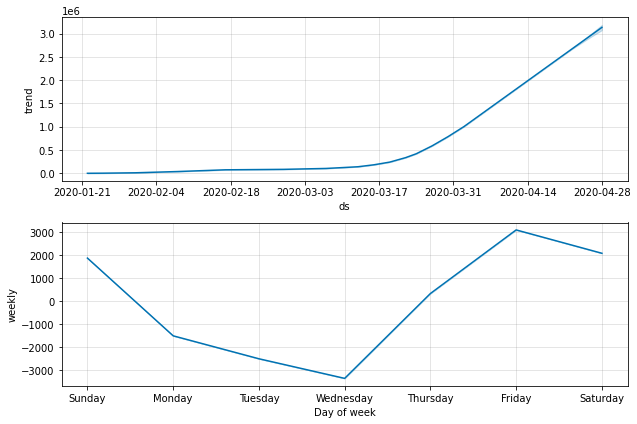

In [54]:
forecast_components = m.plot_components(forecast)

Analysis using RNN via PyTorch

In [55]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [56]:
c=[]
world_cases = []
Y=[]
for i in dates:
  c= confirmed_cases.iloc[:,4:].sum(axis=0)
daily_cases=c.copy()
daily_cases.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

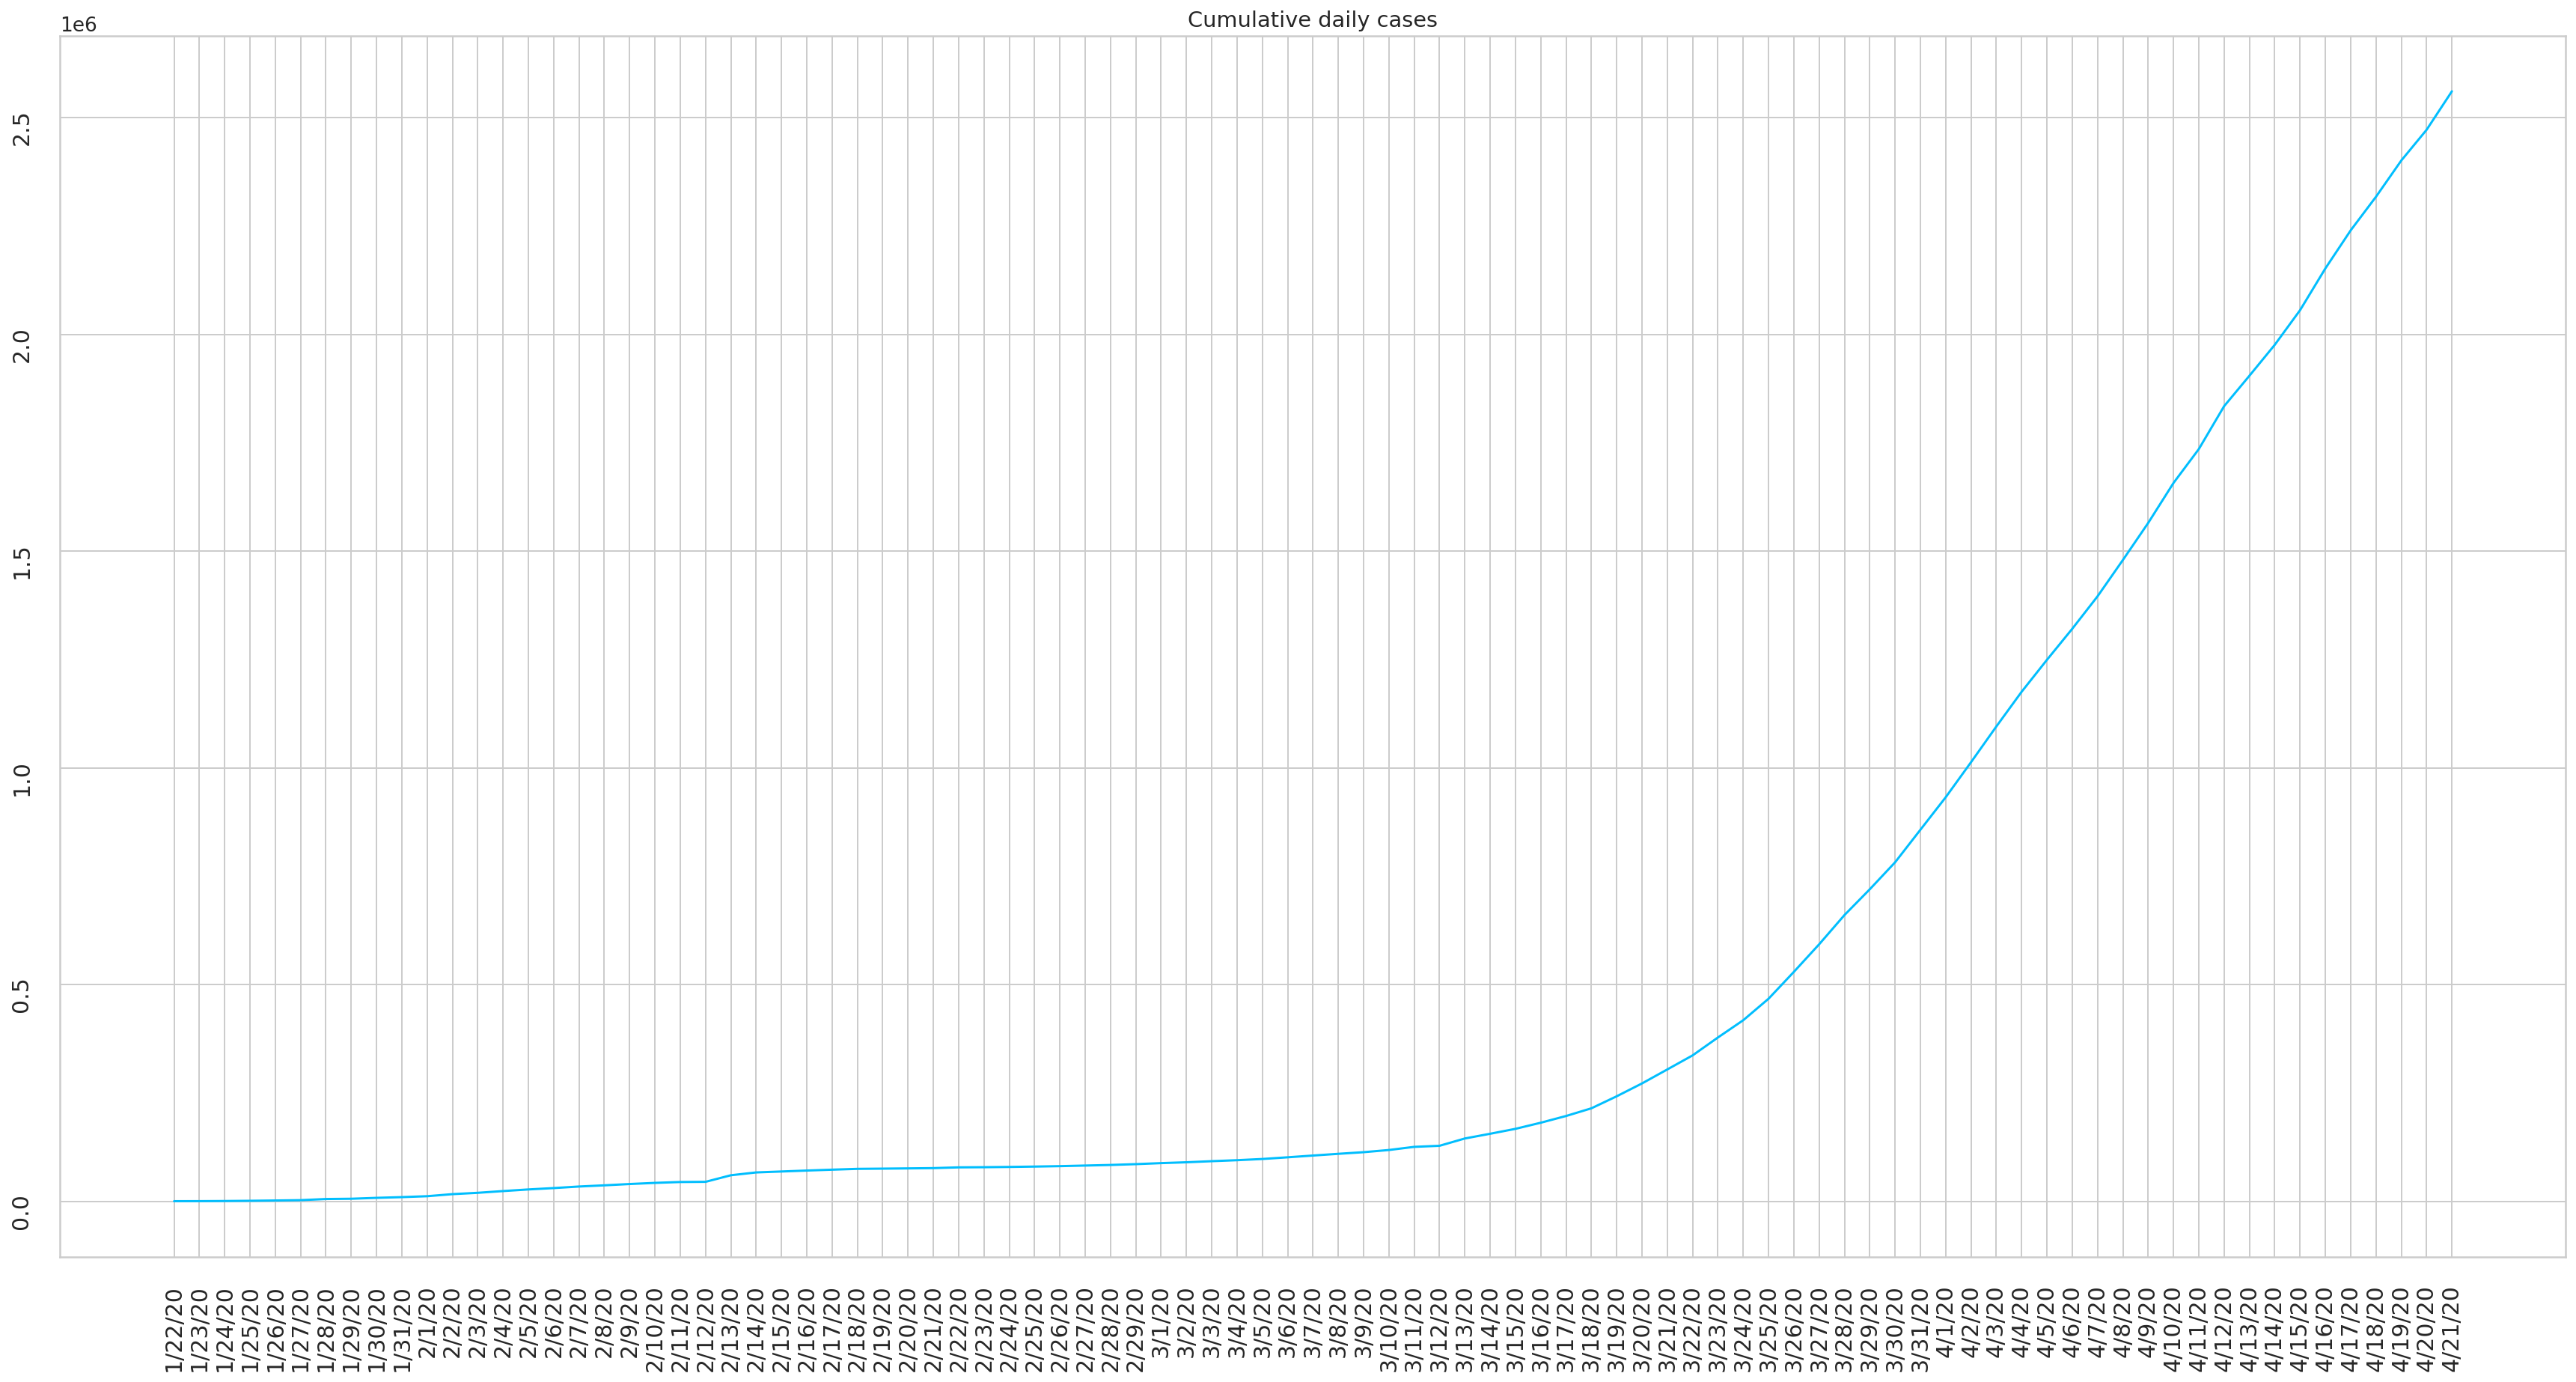

In [57]:
plt.figure(figsize=(30, 15))
plt.plot(daily_cases)
plt.title("Cumulative daily cases");
plt.tick_params(size=15,labelsize = 15,rotation=90)
plt.show()

In [58]:
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head

<bound method NDFrame.head of 1/22/20      555
1/23/20       99
1/24/20      287
1/25/20      493
1/26/20      684
           ...  
4/17/20    87753
4/18/20    77568
4/19/20    83620
4/20/20    70880
4/21/20    88785
Length: 91, dtype: int64>

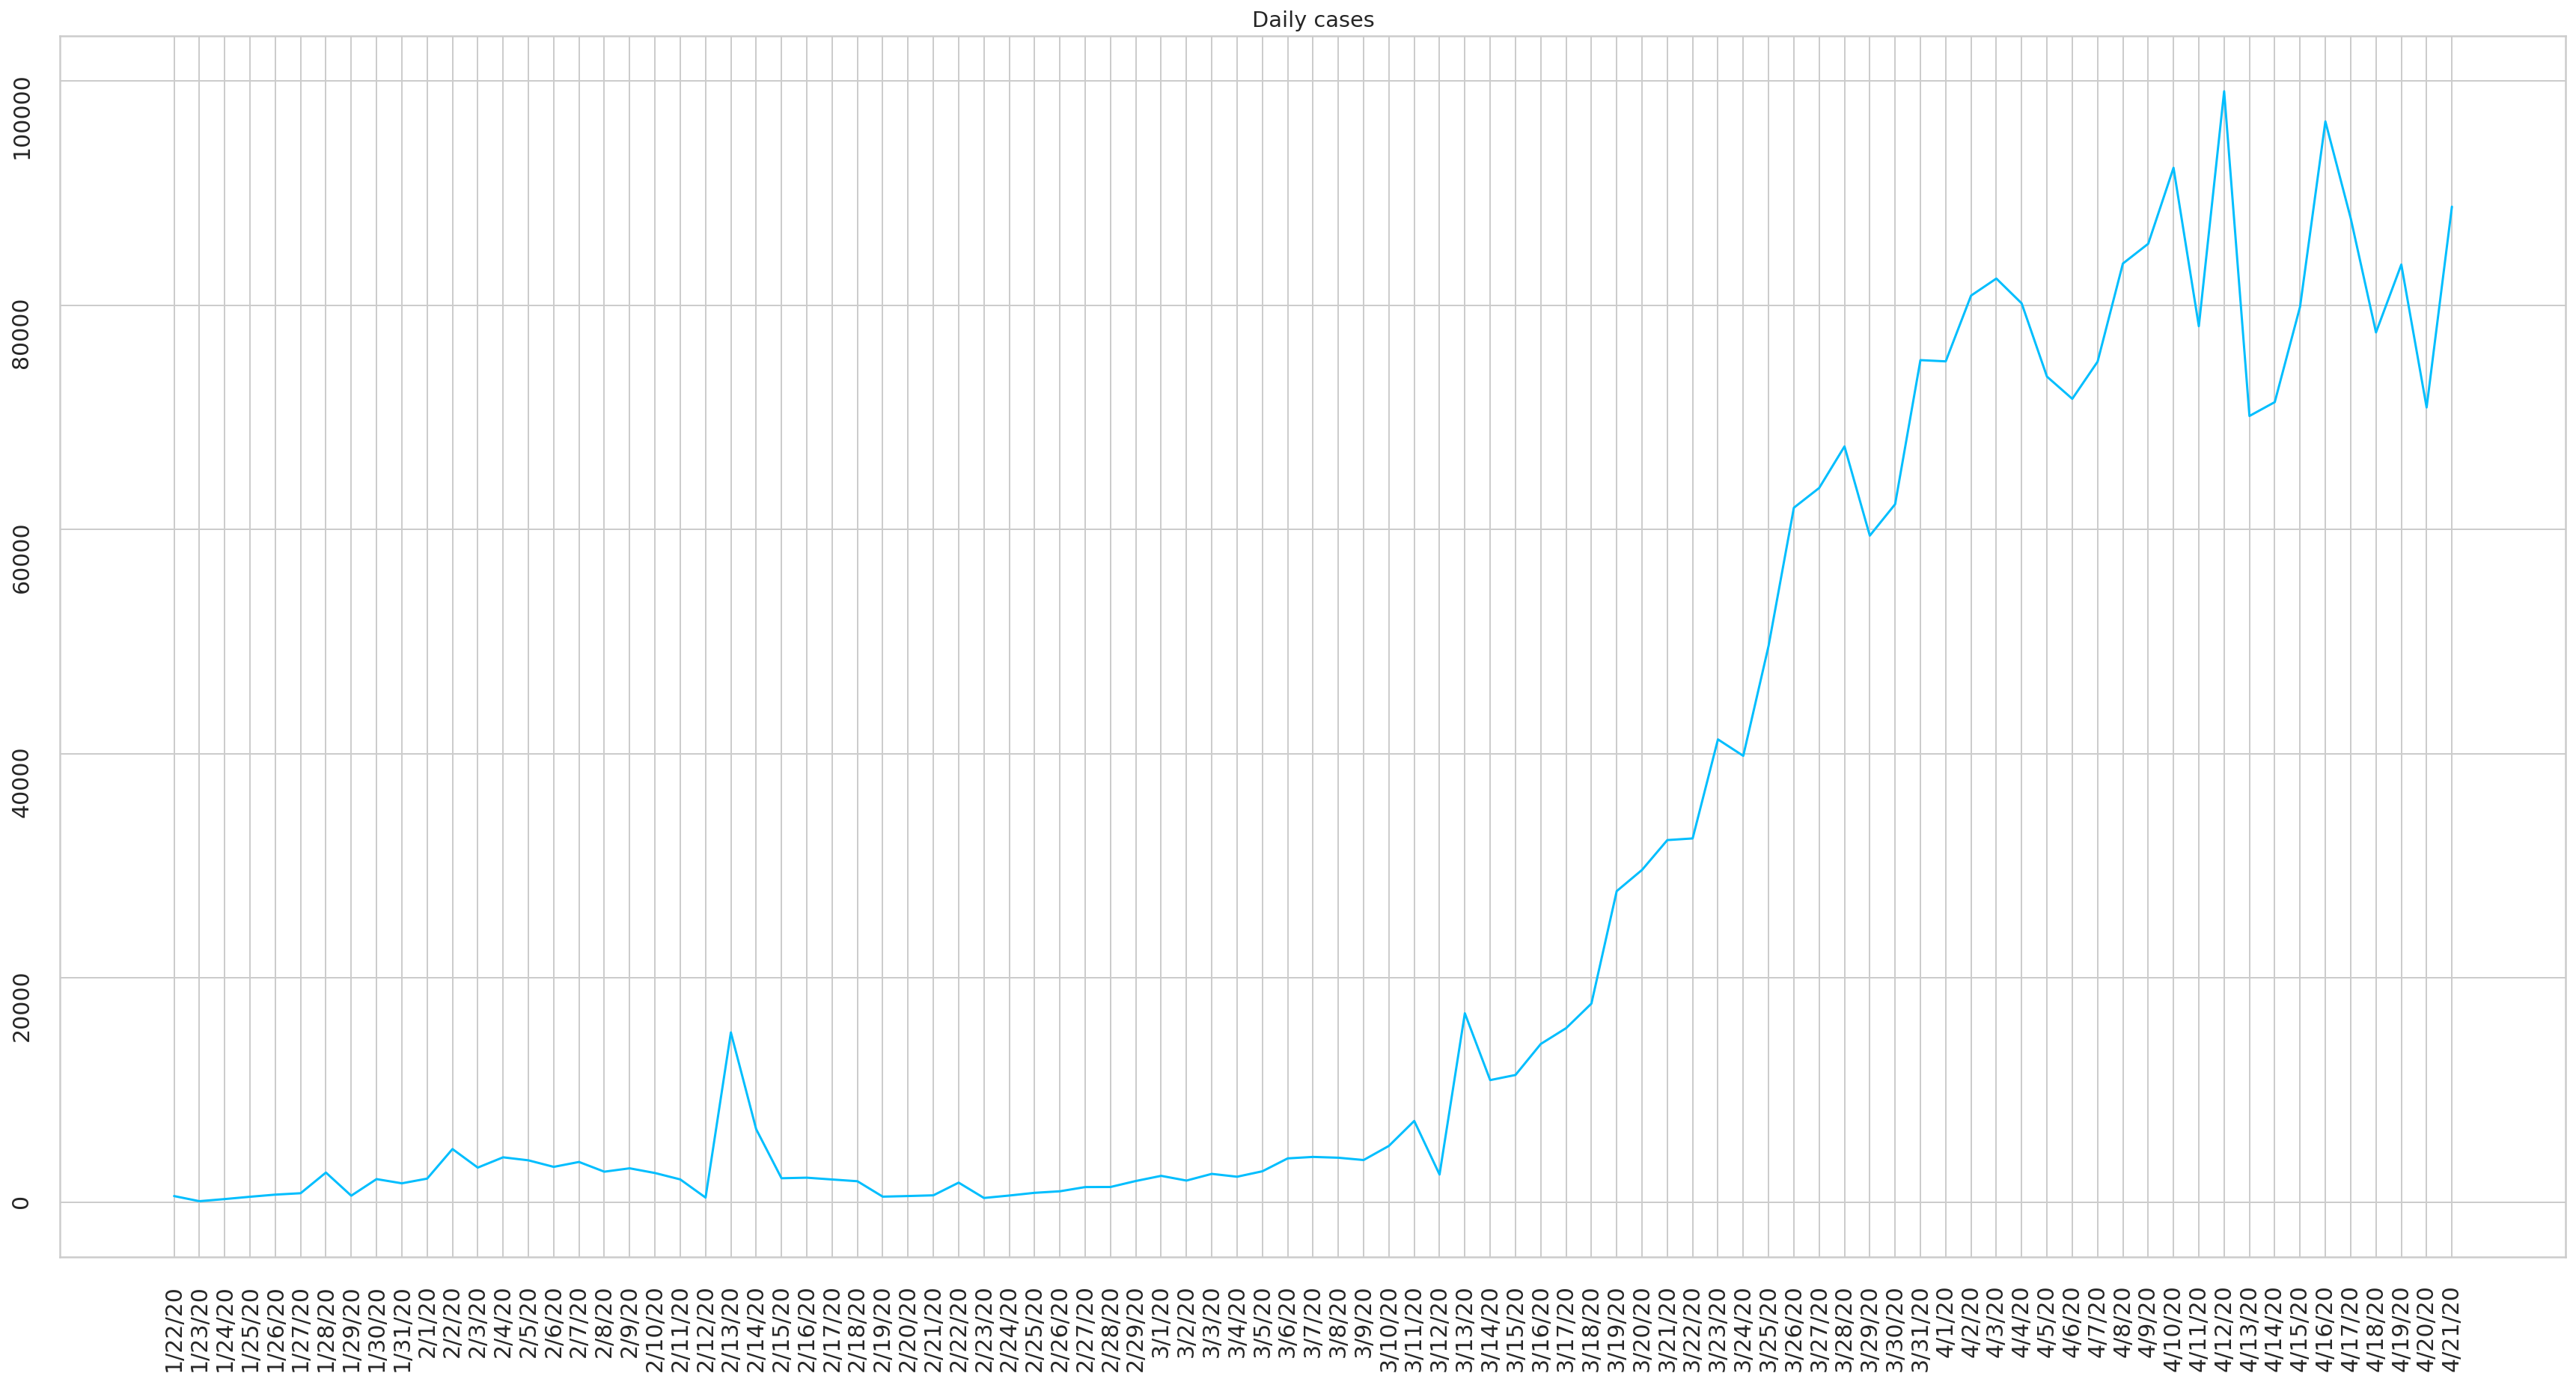

In [59]:
plt.figure(figsize=(30, 15))
plt.plot(daily_cases)
plt.title("Daily cases");
plt.tick_params(size=15,labelsize = 15,rotation=90)
plt.show()

Preprocessing

Testing on available data

In [60]:
test_data_size = 14

train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

train_data.shape

(77,)

In [61]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

Currently, we have a big sequence of daily cases. We’ll convert it into smaller ones

In [62]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

Building a model

In [63]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )
    self.rnn = nn.RNN( input_size=n_features, hidden_size=n_hidden,  num_layers=n_layers, batch_first=True, nonlinearity='relu')
 

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

Training

In [64]:
def train_model(
  model,
  train_data,
  train_labels,
  test_data=None,
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

  return model.eval(), train_hist, test_hist

In [65]:
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=32,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model,
  X_train,
  y_train,
  X_test,
  y_test
)

Epoch 0 train loss: 14.202242851257324 test loss: 9.118278503417969
Epoch 10 train loss: 8.629798889160156 test loss: 6.487942695617676
Epoch 20 train loss: 6.6721978187561035 test loss: 3.8624892234802246
Epoch 30 train loss: 6.272304058074951 test loss: 3.666700839996338
Epoch 40 train loss: 6.168397426605225 test loss: 3.9529006481170654
Epoch 50 train loss: 5.577920913696289 test loss: 2.3668935298919678
Epoch 60 train loss: 4.020817279815674 test loss: 0.6046216487884521
Epoch 70 train loss: 2.110940456390381 test loss: 1.2528127431869507
Epoch 80 train loss: 1.7217013835906982 test loss: 2.569973945617676
Epoch 90 train loss: 1.3050918579101562 test loss: 0.96392422914505


Use all data for training to predict future cases

In [67]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_cases, axis=1))

all_data.shape

(91, 1)

In [68]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)


Epoch 0 train loss: 11.118432998657227
Epoch 10 train loss: 4.284459590911865
Epoch 20 train loss: 4.876924991607666
Epoch 30 train loss: 2.8950181007385254
Epoch 40 train loss: 1.9360771179199219
Epoch 50 train loss: 1.952497124671936
Epoch 60 train loss: 1.7139005661010742
Epoch 70 train loss: 1.8111236095428467
Epoch 80 train loss: 1.4933823347091675
Epoch 90 train loss: 1.4053294658660889


Predicting future cases

In [69]:
DAYS_TO_PREDICT = 12

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [70]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

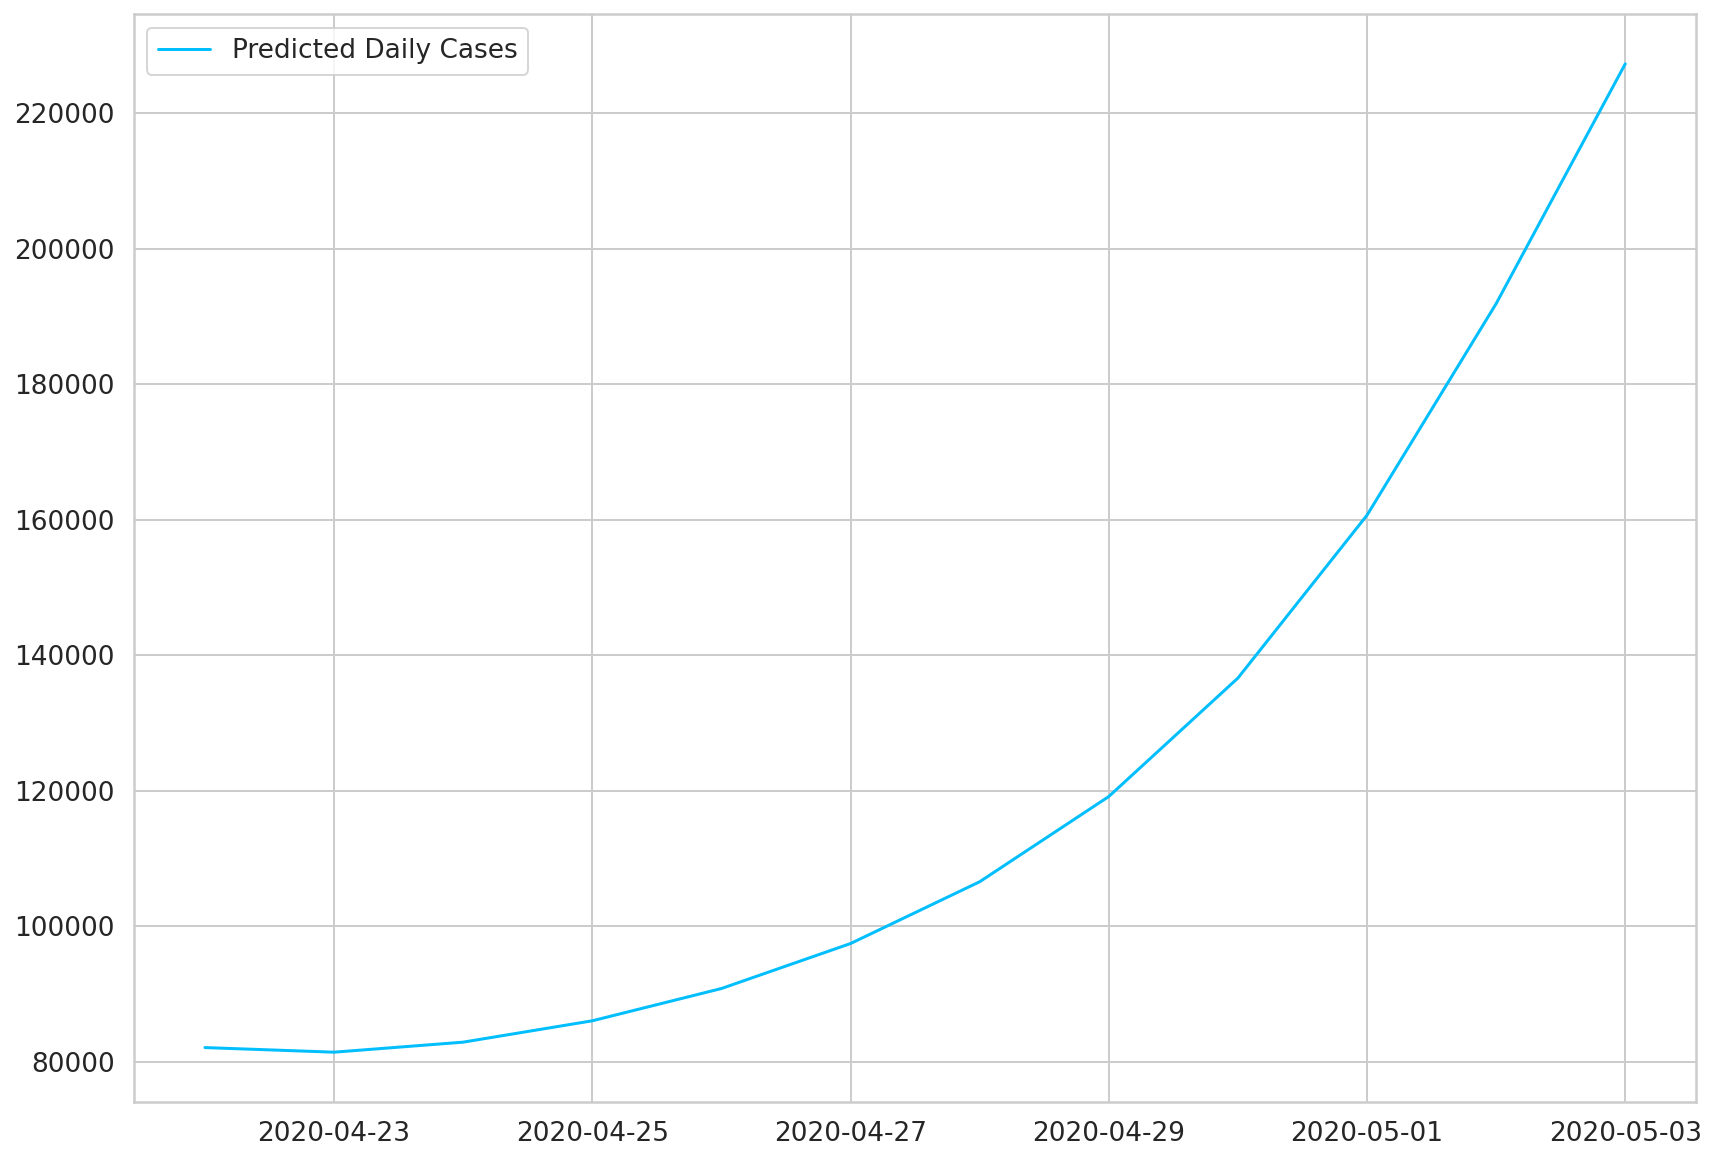

In [71]:
daily_cases.index[-1]
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [72]:
predicted_cases

2020-04-22     82116.577866
2020-04-23     81437.026469
2020-04-24     82916.248588
2020-04-25     86068.858795
2020-04-26     90830.001385
2020-04-27     97470.048077
2020-04-28    106586.061880
2020-04-29    119165.933101
2020-04-30    136646.816729
2020-05-01    160684.238101
2020-05-02    191903.464262
2020-05-03    227292.745882
Freq: D, dtype: float64